<a href="https://colab.research.google.com/github/sezaionurlu/ScoutinClassification-with-Machine-Learning/blob/main/Makine_%C3%96%C4%9Frenmesi_ile_Yetenek_Avc%C4%B1l%C4%B1%C4%9F%C4%B1_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

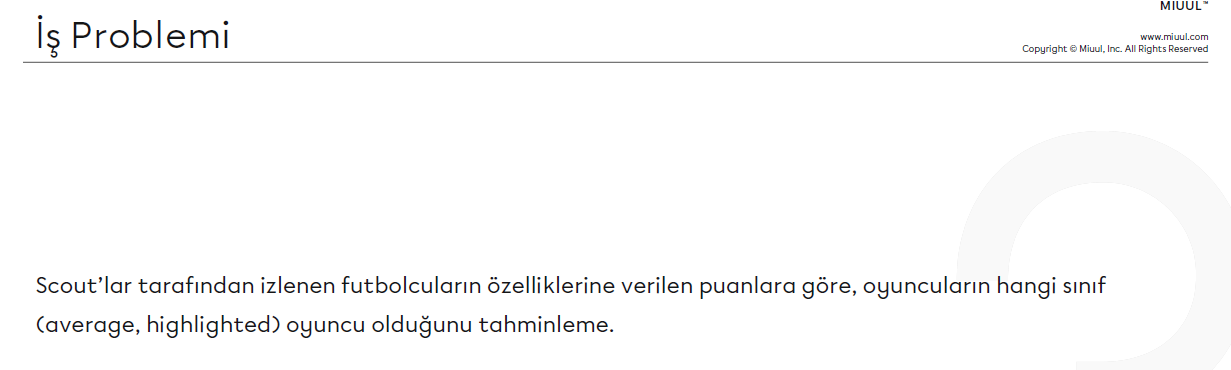

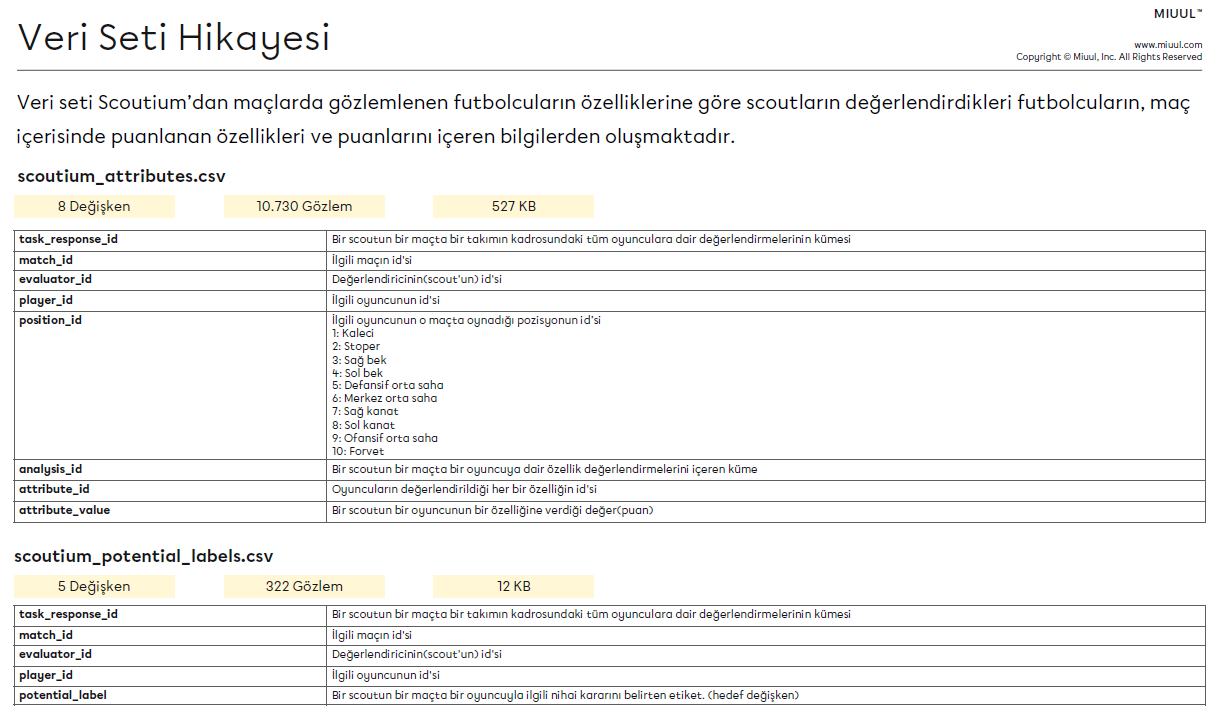

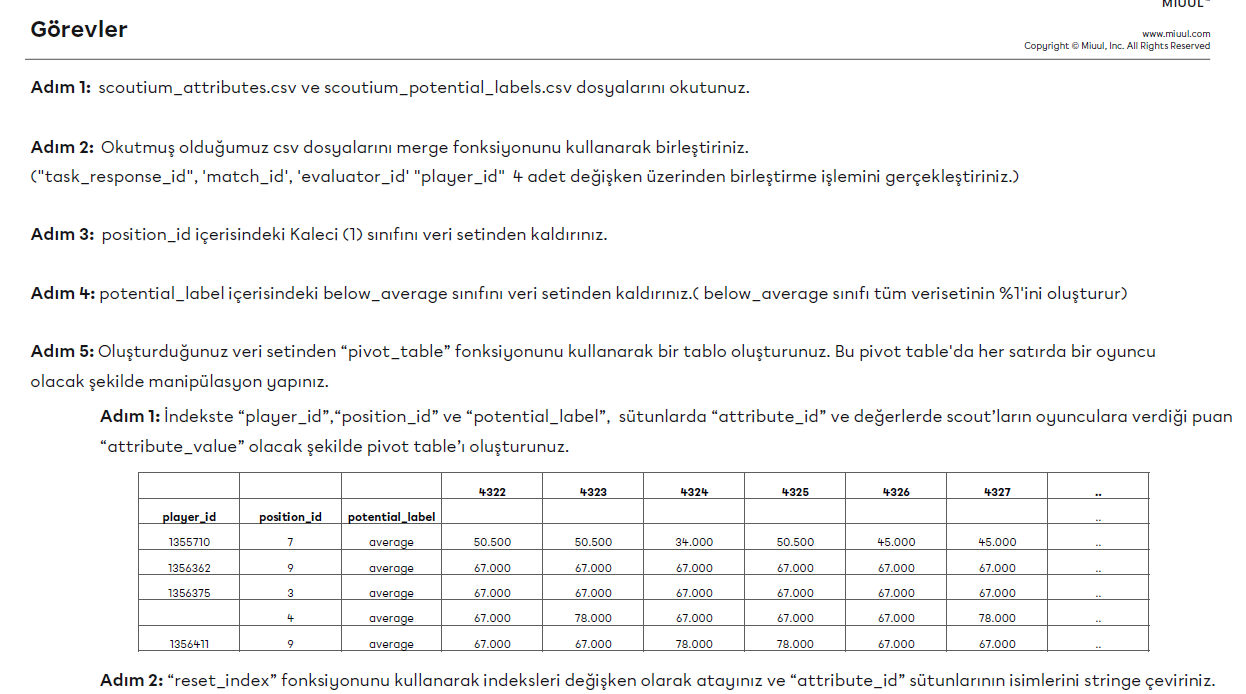

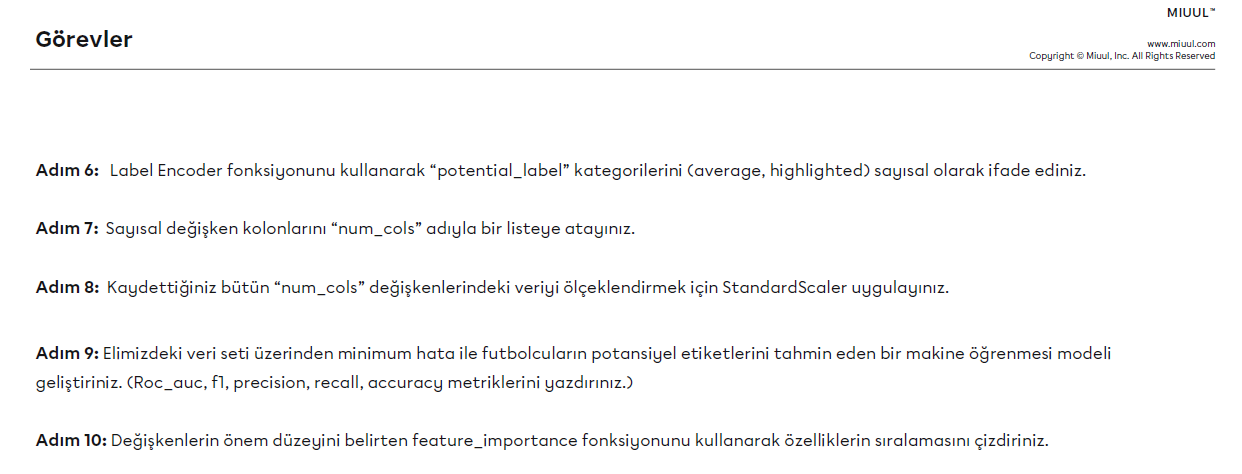

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

!pip install catboost
!pip install xgboost
!pip install lightgbm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Adım 1:

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/8/scoutium_attributes.csv', sep=';')
df1.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [ ]:
df1.shape

(10730, 8)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/Ödevler/8/scoutium_potential_labels.csv', sep=';')
df2.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [ ]:
# Adım 2:

In [ ]:
df = df1.merge(df2, on=["task_response_id", 'match_id', 'evaluator_id',"player_id"])
df

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average
...,...,...,...,...,...,...,...,...,...
10725,5642,63032,151191,1909728,7,12825756,4357,67.0,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.0,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.0,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.0,highlighted


In [ ]:
# Adım 3:

In [ ]:
df = df[df['position_id'] != 1]
df

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average
...,...,...,...,...,...,...,...,...,...
10725,5642,63032,151191,1909728,7,12825756,4357,67.0,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.0,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.0,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.0,highlighted


In [ ]:
df['position_id'].value_counts()

2     1972
6     1428
10    1088
8     1020
7      986
3      986
4      884
9      850
5      816
Name: position_id, dtype: int64

In [ ]:
# Adım 4:

In [ ]:
df = df[df['potential_label'] != 'below_average']
df

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average
...,...,...,...,...,...,...,...,...,...
10725,5642,63032,151191,1909728,7,12825756,4357,67.0,highlighted
10726,5642,63032,151191,1909728,7,12825756,4407,78.0,highlighted
10727,5642,63032,151191,1909728,7,12825756,4408,67.0,highlighted
10728,5642,63032,151191,1909728,7,12825756,4423,67.0,highlighted


In [ ]:
# Adım 5:

In [ ]:
df.pivot_table(index='player_id')

,analysis_id,attribute_id,attribute_value,evaluator_id,match_id,position_id,task_response_id
player_id,,,,,,,
1355710,12824513.0,4348.676471,42.250000,256441.0,63870.5,7.0,5453.0
1356362,12821975.0,4348.676471,66.676471,151191.0,63406.0,9.0,5119.0
1356375,12821380.0,4348.676471,65.867647,141764.0,63286.0,3.5,5077.5
1356411,12821370.5,4348.676471,67.323529,141764.0,63286.0,9.5,5077.5
1358222,12825337.0,4348.676471,42.411765,256441.0,64045.0,2.0,5587.0
...,...,...,...,...,...,...,...
1907330,12819774.5,4348.676471,67.485294,155740.0,63055.0,10.0,4982.0
1907347,12821373.5,4348.676471,68.455882,141764.0,63286.0,5.5,5077.5
1909532,12820202.0,4348.676471,38.852941,141254.0,63061.0,10.0,5006.0


In [ ]:
# Adım 5:
  # Adım 1:

In [ ]:
df_pvt = df.pivot_table(index=['player_id','position_id','potential_label'], columns='attribute_id', values='attribute_value')
df_pvt

attribute_id                           4322  4323  4324  4325  4326  4327  \
player_id position_id potential_label                                       
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0   
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0   
          4           average          67.0  78.0  67.0  67.0  67.0  78.0   
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5           average          67.0  78.0  78.0  56.0  78.0  67.0   
          6           average          67.0  67.0  67.0  67.0  67.0  67.0   
1909532   10          average          56.0  45.0  45.0  45.0  56.0  56.0   
1909724   2           highlighted      78.0  78.0  78.0  78.0  78.0  78.0   
1909728   7           highlighted      78.0  67.0  67.0  78.0  67.0  67.0   

attribute_id                           4328  4329  4330  4332  ...  4352  \
player_id position_id potential_label                          ...         
1355710   7           average          45.0  45.0  50.5  56.0  ...  56.0   
1356362   9           average          67.0  67.0  67.0  67.0  ...  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  ...  67.0   
          4           average          78.0  78.0  56.0  67.0  ...  78.0   
1356411   9           average          67.0  67.0  89.0  78.0  ...  67.0   
...                                     ...   ...   ...   ...  ...   ...   
1907347   5           average          78.0  67.0  56.0  78.0  ...  67.0   
          6           average          67.0  78.0  67.0  67.0  ...  67.0   
1909532   10          average          56.0  56.0  23.0  23.0  ...  45.0   
1909724   2           highlighted      78.0  78.0  67.0  67.0  ...  78.0   
1909728   7           highlighted      67.0  78.0  67.0  67.0  ...  67.0   

attribute_id                           4353  4354  4355  4356  4357  4407  \
player_id position_id potential_label                                       
1355710   7           average          34.0  39.5  50.5  34.0  34.0  56.0   
1356362   9           average          67.0  78.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  67.0  67.0   
          4           average          67.0  67.0  67.0  56.0  67.0  56.0   
1356411   9           average          56.0  67.0  67.0  56.0  67.0  89.0   
...                                     ...   ...   ...   ...   ...   ...   
1907347   5           average          67.0  67.0  67.0  56.0  67.0  78.0   
          6           average          67.0  78.0  67.0  67.0  67.0  67.0   
1909532   10          average          45.0  56.0  34.0  34.0  56.0  34.0   
1909724   2           highlighted      78.0  78.0  67.0  67.0  67.0  78.0   
1909728   7           highlighted      67.0  78.0  67.0  67.0  67.0  78.0   

attribute_id                           4408  4423  4426  
player_id position_id potential_label                    
1355710   7           average          34.0  34.0  56.0  
1356362   9           average          67.0  56.0  78.0  
1356375   3           average          67.0  56.0  78.0  
          4           average          67.0  45.0  56.0  
1356411   9           average          56.0  67.0  78.0  
...                                     ...   ...   ...  
1907347   5           average          78.0  78.0  56.0  
          6           average          67.0  67.0  78.0  
1909532   10          average          34.0  34.0  23.0  
1909724   2           highlighted      78.0  67.0  78.0  
1909728   7           highlighted      67.0  67.0  78.0  

[271 rows x 34 columns]

In [ ]:
# Adım 5:
  # Adım 2:

In [ ]:
df_pvt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271 entries, (1355710, 7, 'average') to (1909728, 7, 'highlighted')
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4322    271 non-null    float64
 1   4323    271 non-null    float64
 2   4324    271 non-null    float64
 3   4325    271 non-null    float64
 4   4326    271 non-null    float64
 5   4327    271 non-null    float64
 6   4328    271 non-null    float64
 7   4329    271 non-null    float64
 8   4330    271 non-null    float64
 9   4332    271 non-null    float64
 10  4333    271 non-null    float64
 11  4335    271 non-null    float64
 12  4338    271 non-null    float64
 13  4339    271 non-null    float64
 14  4340    271 non-null    float64
 15  4341    271 non-null    float64
 16  4342    271 non-null    float64
 17  4343    271 non-null    float64
 18  4344    271 non-null    float64
 19  4345    271 non-null    float64
 20  4348    271 non-null    float6

In [ ]:
df_pvt.columns = df_pvt.columns.astype(str)

In [ ]:
df_pvt.columns

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330',
       '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343',
       '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354',
       '4355', '4356', '4357', '4407', '4408', '4423', '4426'],
      dtype='object', name='attribute_id')

In [ ]:
df_pvt2 = df_pvt.reset_index()
df_pvt2

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,average,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,average,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,highlighted,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [ ]:
# Adım 6:

In [ ]:
df_pvt2['potential_label'].value_counts()

average        215
highlighted     56
Name: potential_label, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
df_pvt2['potential_label'] = LabelEncoder().fit_transform(df_pvt2['potential_label'])

In [ ]:
df_pvt2

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,67.0,78.0,78.0,56.0,78.0,67.0,78.0,...,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,0,56.0,45.0,45.0,45.0,56.0,56.0,56.0,...,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,1,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


In [ ]:
# Adım 7:

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_pvt2)

Observations: 271
Variables: 37
cat_cols: 7
num_cols: 30
cat_but_car: 0
num_but_cat: 7


In [ ]:
num_cols

['player_id',
 '4322',
 '4323',
 '4325',
 '4326',
 '4327',
 '4329',
 '4330',
 '4332',
 '4333',
 '4335',
 '4338',
 '4339',
 '4340',
 '4341',
 '4342',
 '4343',
 '4344',
 '4345',
 '4348',
 '4349',
 '4350',
 '4351',
 '4353',
 '4354',
 '4355',
 '4356',
 '4407',
 '4408',
 '4426']

In [ ]:
# Adım 8:

In [ ]:
StandardScaler().fit_transform(df_pvt2[num_cols])

array([[-0.89162388, -0.54260648, -0.55939849, ..., -0.1426496 ,
        -1.48725625, -0.25274093],
       [-0.8884375 ,  0.59532749,  0.56077632, ...,  0.52966417,
         0.66871284,  1.04161104],
       [-0.88837397,  0.59532749,  0.56077632, ...,  0.52966417,
         0.66871284,  1.04161104],
       ...,
       [ 1.8149541 , -0.16329516, -0.93279009, ..., -1.48727715,
        -1.48725625, -2.19426887],
       [ 1.81589243,  1.35395013,  1.30755952, ...,  1.20197795,
         1.3873692 ,  1.04161104],
       [ 1.81591197,  1.35395013,  0.56077632, ...,  1.20197795,
         0.66871284,  1.04161104]])

In [ ]:
df_pvt2[num_cols] = StandardScaler().fit_transform(df_pvt2[num_cols])

In [ ]:
df_pvt2

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,-0.891624,7,0,-0.542606,-0.559398,34.0,-0.437916,-0.766602,-0.794802,45.0,...,56.0,-1.281899,-1.132245,-0.494569,-1.234869,34.0,-0.142650,-1.487256,34.0,-0.252741
1,-0.888437,9,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,...,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611
2,-0.888374,3,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,...,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611
3,-0.888374,4,0,0.595327,1.307560,67.0,0.682837,0.722639,1.481795,78.0,...,78.0,0.813645,0.428479,0.631718,0.198319,67.0,-0.142650,0.668713,45.0,-0.252741
4,-0.888198,9,0,0.595327,0.560776,78.0,1.430006,0.722639,0.722929,67.0,...,67.0,0.115130,0.428479,0.631718,0.198319,67.0,1.874292,-0.049944,67.0,1.041611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1.804276,5,0,0.595327,1.307560,78.0,-0.064332,1.467260,0.722929,78.0,...,67.0,0.813645,0.428479,0.631718,0.198319,67.0,1.201978,1.387369,78.0,-0.252741
267,1.804276,6,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,...,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,67.0,1.041611
268,1.814954,10,0,-0.163295,-0.932790,45.0,-0.811501,-0.021981,-0.035936,56.0,...,45.0,-0.583384,-0.195810,-1.620856,-1.234869,56.0,-1.487277,-1.487256,34.0,-2.194269
269,1.815892,2,1,1.353950,1.307560,78.0,1.430006,1.467260,1.481795,78.0,...,78.0,1.512160,1.052769,0.631718,0.914913,67.0,1.201978,1.387369,67.0,1.041611


In [ ]:
df_pvt2.index

RangeIndex(start=0, stop=271, step=1)

In [ ]:
# Adım 9:

In [ ]:
df_pvt2['position_id'] = df_pvt2['position_id'].astype(str)

In [ ]:
df_pvt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        271 non-null    float64
 1   position_id      271 non-null    object 
 2   potential_label  271 non-null    int64  
 3   4322             271 non-null    float64
 4   4323             271 non-null    float64
 5   4324             271 non-null    float64
 6   4325             271 non-null    float64
 7   4326             271 non-null    float64
 8   4327             271 non-null    float64
 9   4328             271 non-null    float64
 10  4329             271 non-null    float64
 11  4330             271 non-null    float64
 12  4332             271 non-null    float64
 13  4333             271 non-null    float64
 14  4335             271 non-null    float64
 15  4338             271 non-null    float64
 16  4339             271 non-null    float64
 17  4340            

In [ ]:
df_pvt2 = pd.get_dummies(df_pvt2,'position_id', drop_first=True)
df_pvt2

,player_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426,position_id_2,position_id_3,position_id_4,position_id_5,position_id_6,position_id_7,position_id_8,position_id_9
0,-0.891624,0,-0.542606,-0.559398,34.0,-0.437916,-0.766602,-0.794802,45.0,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,56.0,-1.281899,-1.132245,-0.494569,-1.234869,34.0,-0.142650,-1.487256,34.0,-0.252741,0,0,0,0,0,1,0,0
1,-0.888437,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611,0,0,0,0,0,0,0,1
2,-0.888374,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,56.0,1.041611,0,1,0,0,0,0,0,0
3,-0.888374,0,0.595327,1.307560,67.0,0.682837,0.722639,1.481795,78.0,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,78.0,0.813645,0.428479,0.631718,0.198319,67.0,-0.142650,0.668713,45.0,-0.252741,0,0,1,0,0,0,0,0
4,-0.888198,0,0.595327,0.560776,78.0,1.430006,0.722639,0.722929,67.0,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,67.0,0.115130,0.428479,0.631718,0.198319,67.0,1.874292,-0.049944,67.0,1.041611,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1.804276,0,0.595327,1.307560,78.0,-0.064332,1.467260,0.722929,78.0,0.404075,-0.054888,1.504961,1.132359,0.319105,0.631888,0.840464,1.638803,0.054515,0.588047,0.573607,0.749536,0.742305,1.505252,2.724027,0.847750,1.485027,67.0,0.813645,0.428479,0.631718,0.198319,67.0,1.201978,1.387369,78.0,-0.252741,0,0,0,1,0,0,0,0
267,1.804276,0,0.595327,0.560776,67.0,0.682837,0.722639,0.722929,67.0,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,1.336806,1.229965,0.749536,0.742305,0.878802,1.354645,0.847750,0.716763,67.0,0.813645,1.052769,0.631718,0.914913,67.0,0.529664,0.668713,67.0,1.041611,0,0,0,0,1,0,0,0
268,1.814954,0,-0.163295,-0.932790,45.0,-0.811501,-0.021981,-0.035936,56.0,-0.193765,-2.403505,-2.563989,-1.560461,-0.358264,-0.071363,-1.379234,-1.995531,-0.690375,-0.909470,-1.395467,-1.205671,-1.354373,-1.626998,-1.384121,-1.463779,-2.356293,45.0,-0.583384,-0.195810,-1.620856,-1.234869,56.0,-1.487277,-1.487256,34.0,-2.194269,0,0,0,0,0,0,0,0
269,1.815892,1,1.353950,1.307560,78.0,1.430006,1.467260,1.481795,78.0,1.001915,0.727985,0.691171,1.132359,1.673842,1.335139,0.840464,1.638803,0.799406,1.336806,0.573607,0.749536,1.441197,1.505252,1.354645,1.618260,1.485027,78.0,1.512160,1.052769,0.631718,0.914913,67.0,1.201978,1.387369,67.0,1.041611,1,0,0,0,0,0,0,0


In [ ]:
y = df_pvt2["potential_label"]
X = df_pvt2.drop(["potential_label","player_id"], axis=1)

In [ ]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [ ]:
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

In [ ]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())

0.8708417508417508
0.5668453669093055
0.8955602536997886
0.9054545454545455
0.4424242424242424


In [ ]:
y.value_counts()

0    215
1     56
Name: potential_label, dtype: int64

In [ ]:
catboost_model.get_params()

{'random_state': 17, 'verbose': False}

In [ ]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [ ]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())

0.8855892255892256
0.6449142653012622
0.8965821000704721
0.8595238095238095
0.5484848484848485


In [ ]:
catboost_best_grid.best_params_

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [ ]:
catboost_params = {"iterations": [500, 750],
                   "learning_rate": [0.1, 1],
                   "depth": [6,10]}

In [ ]:
catboost_best_grid2 = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final2 = catboost_model.set_params(**catboost_best_grid2.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(catboost_final2, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


CatBoostError: ignored

In [ ]:
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

In [ ]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())

0.8491582491582491
0.5879102167182663
0.841508104298802
0.7463675213675214
0.5015151515151516


In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [ ]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

In [ ]:
print(cv_results['test_accuracy'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_precision'].mean())
print(cv_results['test_recall'].mean())

0.8676094276094275
0.6087953841823811
0.8358527131782946
0.8466666666666667
0.48484848484848486


In [ ]:
# Catboost
0.8855892255892256
0.6449142653012622
0.8965821000704721
0.8595238095238095
0.5484848484848485

In [ ]:
# Adım 10:

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

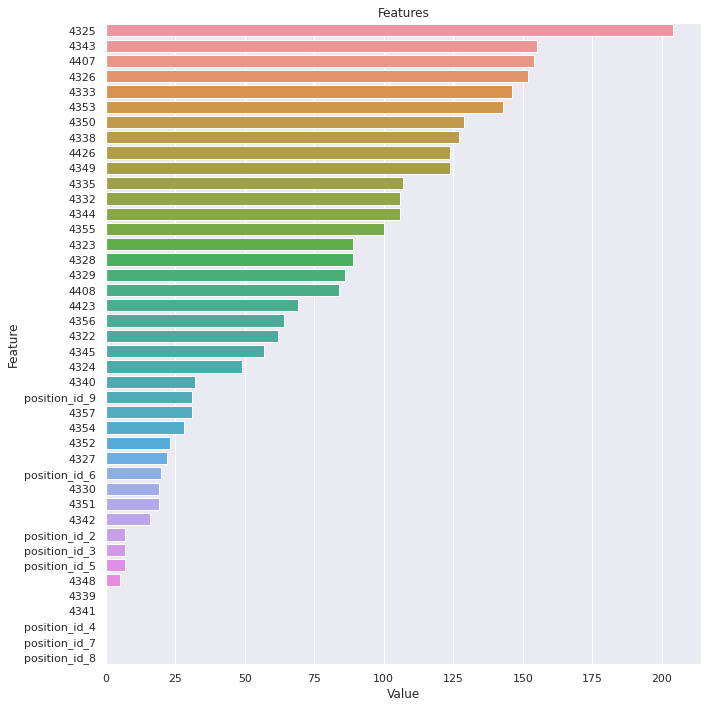

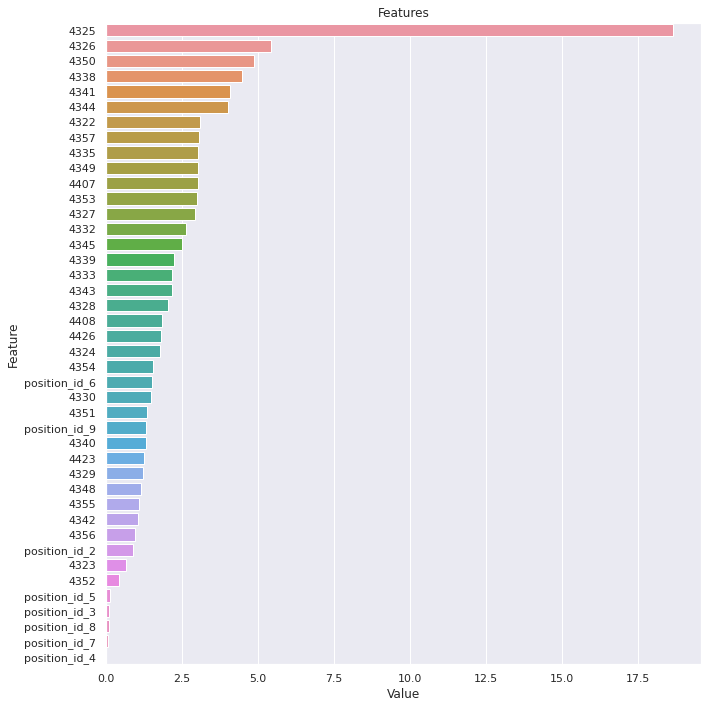

In [ ]:
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)